# Using data from a sqlite database to draw a box or whisker plot


## SQLite iris database

We used sqlite in COMP0035 so the following uses the sqlite3 Python library. If you used a different database, e.g. MySQL, then you will need to use an appropriate library for that database.

This example uses the iris database which you will often see used in Data Science and Machine Learning tutorials.

The database has 1 table as follows:

table name: iris  
columns (name, data type):  
    index	INT   
    SepalLength	FLOAT  
    SepalWidth	FLOAT  
    PetalLength	FLOAT  
    PetalWidth	FLOAT  
    Species	TEXT  

## Getting started
Run the next cell to import the libraries.

In [2]:
import pandas as pd
import matplotlib as mpl
import sqlite3

%matplotlib inline

## Querying the database
### Using sqlite3 to query the database

In [3]:
# Create a connection object to the database
conn = sqlite3.connect('iris.sqlite')

# Create a cursor object, this allows you to execute SQL queries on the database
cur = conn.cursor()

# Use the execute method of the cursor object to run a query. The following finds the first 5 rows in the iris table.
cur.execute('SELECT * FROM iris LIMIT 5;')

# We then execute a second command to get the results and assign them to a variable
results = cur.fetchall()

# Print the results
results

[(0, 5.1, 3.5, 1.4, 0.2, 'setosa'),
 (1, 4.9, 3.0, 1.4, 0.2, 'setosa'),
 (2, 4.7, 3.2, 1.3, 0.2, 'setosa'),
 (3, 4.6, 3.1, 1.5, 0.2, 'setosa'),
 (4, 5.0, 3.6, 1.4, 0.2, 'setosa')]

### Using sqlite3 and pandas to query the database
In the examples to date we have used pandas dataframes. We could create a dataframe from the data returned from the cell above however you would then need to manually add column names. Instead once we create the database connection, we can then use a pandas method to read the data in a similar was as we did when reading .csv and .xlsx files.

In [4]:
# Create a connection object to the database
conn = sqlite3.connect('iris.sqlite')

# Create a dataframe with the contents of the iris table
df = pd.read_sql('SELECT * FROM iris;', conn, index_col='index')

# Print the first 5 rows
df.head(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
index,,,,,
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Using SQLAlchemy and pandas to query the database
You won't need to use this for the first coursework, however in the second half of the term when we start to look at creating Flask web apps we will be using an object relational mapper (ORM) called SQLAlchemy.

The syntax for the same query using SQLAlchemy:

In [14]:
from sqlalchemy import create_engine

engine = create_engine('sqlite:///iris.sqlite')

connection = engine.connect()

# If we had defined our database using SQLAlchemy we could use the following: 
# df = pd.read_sql_table('iris', connection)
# However, read_sql_table won't work in the conext of this notebook. Instead use read_sql or read_sql_query:
query = 'SELECT * FROM iris'
df = pd.read_sql(query, connection, index_col='index')

# Close the database connection
connection.close()

df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
index,,,,,
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
# Read the to_sql method documentation to understand that parameters that can be used
df.to_sql?

## Draw a box (or whisker) plot for the iris data

Read the [data visualisation catalogue entry for box and whisker plot](https://datavizcatalogue.com/methods/box_plot.html).

Box plots are useful for:
- Understanding the spread of the data.
- Spotting outliers.
- Comparing distributions.

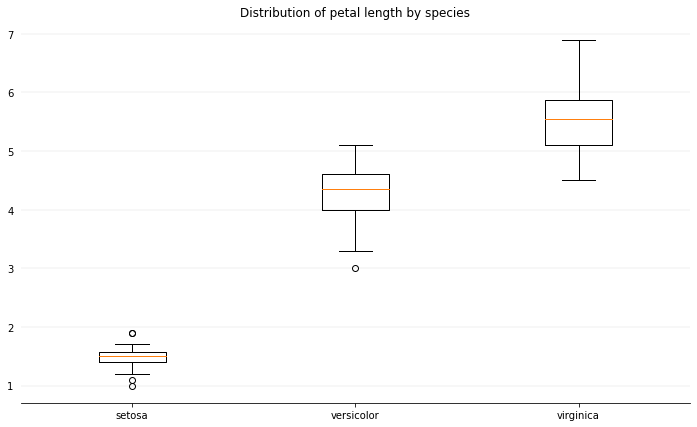

In [64]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

conn = sqlite3.connect('iris.sqlite')

df = pd.read_sql('SELECT * FROM iris;', conn, index_col='index')

# Prepare petal length by species datasets
setosa_petal_length = df[df['Species'] == 'setosa']['PetalLength']
versicolor_petal_length = df[df['Species'] == 'versicolor']['PetalLength']
virginica_petal_length = df[df['Species'] == 'virginica']['PetalLength']

# Visualize petal length distribution for all species
fig, ax = plt.subplots(figsize=(12, 7))

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

# Set plot title
ax.set_title('Distribution of petal length by species')

# Set species names as labels for the boxplot
dataset = [setosa_petal_length, versicolor_petal_length, virginica_petal_length]
labels = df['Species'].unique()
ax.boxplot(dataset, labels=labels)
plt.show()

Insights from this plot:
- Iris Setosa has a much smaller petal length than Iris Versicolor and Virginica. It ranges from approximately 1 to 2 centimeters.
- The range of petal length of Iris Virginica is bigger than both the ranges of values for Iris Setosa and Versicolor. We can see that from how tall the box is for Iris Virginica compared to the other two.
- Both Iris Setosa and Veriscolor have outliers.

## Save from pandas DataFrame to sqlite database
For the coursework you may need to save data to your database. You can save data from a dataframe to a database.

In the following example we will read from a csv file to a dataframe, and then save from a dataframe to a sqlite database.

## Save from pandas DataFrame to sqlite database
For the coursework you may need to save data to your database. You can save data from a dataframe to a database.

In the following example we will read from a csv file to a dataframe, and then save from a dataframe to a sqlite database.

In [19]:
# Create a connection object to the database, sqlite by default creates a database file if one does not exist
conn = sqlite3.connect('achievement.sqlite')

# Create a data frame from the data in the math achievement csv file
df = pd.read_csv('math_achievement_8th_grade.csv')

# Save the data to a table called achievement in the database
df.to_sql('achievement', conn, index=False)

# Query the achievement database for all countries starting with A just to demonstrate that it was created
query = "SELECT * FROM achievement WHERE country LIKE 'A%'"
df = pd.read_sql(query, conn)
df

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Algeria,NaN,None,None,None,None,None,None,None,NaN,None,None,None,387
1,Armenia,NaN,None,None,None,None,None,None,None,478.0,None,None,None,499
2,Australia,509.0,None,None,None,None,None,None,None,505.0,None,None,None,496
